# Automate 

## Immo 75
Real estate data in Paris

In [1]:
def dvf(code_commune):  
    # demande de valeur financiere
    # dvf(75114)
    import urllib.request
    import json    

    try:
        url = "https://26yrburrn0.execute-api.eu-west-3.amazonaws.com/dev/dvf?code_commune="+str(code_commune)   
        response = urllib.request.urlopen(url)
        html = response.read()
        json_data = json.loads(html)
        
    except urllib.error.URLError:
        # if the API doesnt work, read the file
        print('Problem with the API')
          
    return json_data

In [2]:
json_data = dvf(75114)

In [3]:
import pandas as pd
df = pd.DataFrame.from_dict(json_data)
df

,adresse_code_voie,adresse_nom_voie,adresse_numero,adresse_suffixe,ancien_code_commune,ancien_id_parcelle,ancien_nom_commune,code_commune,code_departement,code_nature_culture,...,nature_mutation,nom_commune,nombre_lots,nombre_pieces_principales,numero_disposition,numero_volume,surface_reelle_bati,surface_terrain,type_local,valeur_fonciere
9969,1158,RUE BOULARD,45.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,1,3.0,1,NaN,31.0,NaN,Appartement,95000.0
9970,6875,RUE D ODESSA,9.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,1,3.0,1,NaN,43.0,NaN,Appartement,545000.0
9971,8446,RUE DE LA SABLIERE,26.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,2,1.0,1,NaN,18.0,NaN,Appartement,220000.0
9972,8105,AV REILLE,33.0,B,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,1,1.0,1,NaN,25.0,NaN,Appartement,132500.0
9973,5000,RUE JONQUOY,41.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,2,4.0,1,NaN,75.0,NaN,Appartement,590000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10872,3967,RUE GASSENDI,17.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,2,2.0,1,NaN,21.0,NaN,Appartement,335500.0
10873,3967,RUE GASSENDI,17.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,1,1.0,1,NaN,10.0,NaN,Appartement,335500.0
10874,2639,RUE DECRES,7.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,1,0.0,1,NaN,25.0,NaN,Local industriel. commercial ou assimilé,238925.0
10875,2639,RUE DECRES,7.0,NaN,NaN,NaN,NaN,75114,75,NaN,...,Vente,Paris 14e Arrondissement,1,0.0,1,NaN,12.0,NaN,Local industriel. commercial ou assimilé,238925.0


In [4]:
df.to_excel('dvf14.xlsx')

##  Excel automation

In [5]:
import openpyxl as xl
from openpyxl.chart import LineChart, Reference

Adding manually a second sheet selecting only the surface and price

In [8]:
workbook = xl.load_workbook('dvf14.xlsx')
sheet_1 = workbook['Sheet1']
sheet_2 = workbook['Sheet2']

In [9]:
values = Reference(sheet_2, min_row = 2, max_row = sheet_1.max_row, min_col = 2, max_col = 2)
values

'Sheet2'!$B$2:$B$909

In [10]:
chart = LineChart()
chart.y_axis.title = 'Price'
chart.x_axis.title = 'Index'
chart.add_data(values)
sheet_2.add_chart(chart, 'e2') 
workbook.save('dvf14_chart.xlsx')

![immo_chart](immo_chart.png)

## Extracting chart

In [39]:
input_file = "C:\\Users\\ydebray\\Downloads\\automate\\dvf14_chart.xlsx"
output_image = "chart.png"

In [40]:
import win32com.client
operation = win32com.client.Dispatch("Excel.Application")
operation.Visible = 0
operation.DisplayAlerts = 0
workbook_bis = operation.Workbooks.Open(input_file)
sheet_bis = operation.Sheets(2)

In [41]:
from PIL import ImageGrab, Image
for x, chart in enumerate(sheet_bis.Shapes):
    chart.Copy()
    image = ImageGrab.grabclipboard()
    image.save(output_image, 'png')
    pass
workbook_bis.Close(True)
operation.Quit()

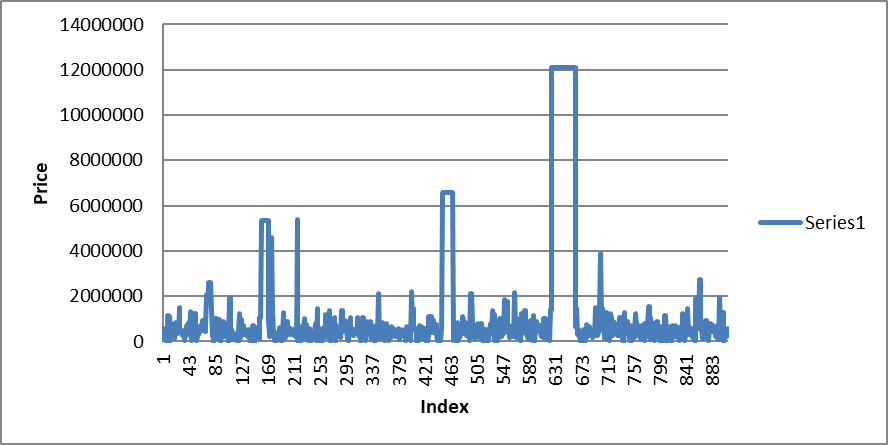

In [42]:
from IPython.display import Image
Image(output_image)